### Selection Bias Under Multiple Testing

이 절에서는 다음의 수치 예제를 사용해 다중 검정($\text{SBuMT}$)하에서 선택 편향의 위험성을 자세히 살펴본다. 한 연구자가 분석을 마치고 'Promising' Trading Strategy를 매니저에게 보고했다고 가정해 보자. 백테스트는 연율화된 Sharpe Ratio가 약 1이고, 연율화된 실현 변동성이 약 15%임을 보여준다. 백테스트는 지난 5년간의 일일 수익률을 산출물로 제공하므로, 관측치의 수는 $T = 5 \times 252 = 1260$이다.

PM은 이 발견이 통계적으로 얼마나 유의한지 평가하려고 한다. 그들은 Sharpe Ratio의 "참값"이 주어지면, 실현된 Sharpe Ratio는 참값 근처 어딘가에 있을 수 있으며, 정규 분포(Bailey and Lopez de Prado 2012)에 의해 정의된 확률과 다음과 같은 표준 편차가 주어진다.

$$\sigma_{\text{SR}} = \sqrt{\frac{1}{T} \left( 
1 - \gamma_3 \text{SR} + \frac{\gamma_4 - 1}{4} \text{SR}^2
\right)}$$

여기서 $T$는 관측치의 개수, $\gamma_3$는 분포의 왜도, $\gamma_4$는 분포의 첨도를 의미한다(여기서 정규분포의 첨도는 3이다). 이 통찰력을 바탕으로 매니저는 실제 Sharpe Ratio가 실제로 $\text{SR}^* = 0$이라는 귀무 가설에 대해 보고된 값 $y=1$에 대한 표준 통계 검정을 실행한다. 표준 검정을 시행하기 위해서는 다음과 같이 누적 확률을 계산해야 한다.

$$F_Y \left(y \right) = P(\text{SR} \leq y)$$

$\text{SR}$값의 정규 분포와 $\sigma_{\text{SR}}$에 의해 설명된 분포를 가정하면 검정의 p-value는 $p = F_Y \left( y \right) = 0.02$, 연율화 컷오프 값인 $\text{SR}_{\text{cut off}} = 0.74$로 계산된다. 보고된 $\text{SR}$은 컷오프 값보다 훨씬 높고 p-value 값은 0.05 미만이므로 귀무 가설이 이러한 결과를 생성할 가능성은 5% 미만이다. 포트폴리오 매니저는 95% 신뢰하여 귀무 가설을 기각하고 연구자의 보고서를 '새로운 발견'으로 받아들일 수 있다. 그러나, 한 가지 문제점이 발생한다. 포트폴리오 매니저는 이외에도 10가지의 다른 시도가 시도되었으며, 연구원이 그 중 가장 높은 Sharpe Ratio를 가진 시도만 보고했다는 것을 알게 된다. 이것은 $\text{SBuMT}$에 의해 설명되는 전형적인 상황이다.

이해를 위해, 아래의 그림은 10,000회의 시뮬레이션을 실행하여 얻은 histogram이며, 세 가지 시나리오에 대해 실현된 Sharpe Ratio를 보여준다.

1. Blue with expected SR = 0
2. Amber with expected SR = 1
3. Green with expected maximum SR of a sample of 10 trials with expected SR = 0



In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n_samples = 10000
sr_0 = np.random.normal(0, 0.4, n_samples)
sr_1 = np.random.normal(1, 0.4, n_samples)

n_signals = 10
sr_0_signals = np.random.normal(0, 0.4, (n_signals, n_samples))
sr_0_max = sr_0_signals.max(axis = 0)

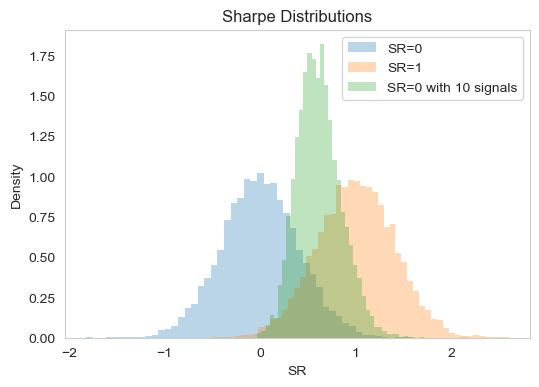

In [30]:
plt.figure(figsize = (6, 4))
sns.histplot(
    sr_0, 
    label = 'SR=0',
    stat = 'density', 
    bins = 50, 
    alpha = 0.3,
    edgecolor = 'none',
    color = 'tab:blue'
)
sns.histplot(
    sr_1,  
    label = 'SR=1', 
    stat = 'density', 
    bins = 50, 
    alpha = 0.3,
    edgecolor = 'none',
    color = 'tab:orange'
)
sns.histplot(
    sr_0_max, 
    label = 'SR=0 with 10 signals', 
    stat = 'density', 
    bins = 50, 
    alpha = 0.3,
    edgecolor = 'none',
    color = 'tab:green'
)

plt.title('Sharpe Distributions')
plt.xlabel('SR')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()

녹색 분포의 평균은 $\text{SR} = 0.7$정도이다. 이는 표준 단일 시행 통계 검정의 컷오프 값에 상당히 가깝다. 즉 실현된 최대 $\text{SR}$의 약 절반이 표준 단일 시행 통계 검정에서 유의한 것으로 간주된다는 것을 의미한다. 이는 평균이 0인 $N$개의 random walk 과정 중에서 명백하게 유의한 전략을 찾는 것이 얼마나 쉬운지를 보여준다. 녹색 분포는 단일 시행 가설 아래의 분포보다 좁으며, 이는 다중 검정 가정 하에서 $\text{SR}$ 유의성을 검정하기 위해 위 식으로로 계산된 $\sigma_{\text{SR}}$을 사용하는 것이 적절하지 않다는 것을 의미한다. 또한 기대되는 최대 $\text{SR}$의 분포가 정규 분포를 벗어나지만 급격하게 벗어나지는 않는다.

포트폴리오 매니저는 이전에 실행된 표준 검정이 충분하지도 않고 적절하지도 않다는 것을 깨닫고 보고된 Sharpe Ratio를 이러한 여러 검정을 고려한 다른 귀무 가설에 대해 검정해야 한다. 새로운 귀무 가설은 보고된 Sharpe Ratio가 zero-mean 랜덤 독립 검정에서 얻은 최대 $K = 10$ 값이라는 것이다. 이 검정에 대한 분포의 누적 분포는 다음과 같다.

$$F_Y \left( y \right) = P(\max(\{ \text{SR}_k\}) \leq y) = P\left((\text{SR}_1 < y), … , (\text{SR}_K < y) \right)$$

이 시점에서 포트폴리오 매니저가 취할 수 있는 접근법은 크게 두 가지이다. 첫 번째 접근법은 유의 수준 $\alpha$를 수정하여 Family-wise error rate($\text{FWER}$)를 추정하는 것이다. 검정군의 Sharpe Ratio가 독립적이라고 가정하면 다음과 같이 쓸 수 있다.

$$F_Y \left( y \right) = P(\max(\{ \text{SR}_k\}) \leq y) = P\left((\text{SR}_1 < y), … , (\text{SR}_K < y) \right) = \prod_{k=1}^K P(\text{SR}_k < y)$$

귀무가설은 $F_Y (y) < 1 - \alpha$일때 기각되며, 이는 곧 다음과 같다.

$$\prod_{k=1}^K P(\text{SR}_k < y) < (1 - \alpha_k)^K$$

Type 1 error의 오차율이 $\alpha = 1 - c$, 즉 귀무가설이 참일 경우 검정에서 귀무가설을 평균적으로 $\alpha N$번 기각할 것을 요구한다. 이 목적을 달성하기 위해서는 각 검정의 오차율 $\alpha k$를 조정해야 한다. 수정 내용은 다음과 같다.

$$1 - \alpha = (1 - \alpha_k)^K$$

이것은 Sidak 조정으로 이어진다 (Sidak, 1967)

$$\alpha_k = 1 - (1 - \alpha)^{\frac{1}{K}}$$

그리고 그것의 더 간단한 근사치인 Bonferroni 조정은(Bonferroni, 1936)

$$\alpha_k = \frac{\alpha}{K}$$

이다. 이러한 조정을 통해 각 전략에 대해 귀무 가설이 올바른 $K$개의 독립 검정 그룹을 검정한 후 귀무 가설을 기각할 확률이 5% 미만이 되는 것을 목표로 한다. Sidak 조정은 포트폴리오 매니저를 최상의 전략에 대해 수행된 단일 검정의 p-value보다 큰 $\alpha_k = 0.0051$의 값으로 이끌며, 컷오프 $\text{SR}$ 값은 보고된 Sharpe ratio 1보다 높은 1.15이다. 이러한 결과는 포트폴리오 매니저가 다중 시행 가정 하에서 귀무 가설을 기각할 수 없음을 의미하며, $\text{SR}$이 통계적으로 유의하지 않다는 결론을 내린다. 자세한 내용은 Lopez de Prado(2020)를 참조하라.

두번째 접근법은 극단치 이론(Extreme Value Theory)에서 보다 정확한 Family Wise Error Rate 제어를 도출하는 것이다. Gaussian $Y = \max \left( X_1, X_2, \dots, X_K \right)$ list의 최대값은 다음과 같은 누적 분포를 갖는다.

$$F_Y (y) = P \left( \max(\{X_k\}) \leq y\right) = \prod_{k=1}^K F_{X_k} (y)$$

여기서 $F_{X_k} (y)$